In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("OnlineRetail.csv", encoding="latin1")
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [5]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['InvoiceYearMonth'] = data['InvoiceDate'].map(lambda date: 100*date.year + date.month)

data['Revenue'] = data['UnitPrice'] * data['Quantity']
tx_revenue = data.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
tx_revenue


,InvoiceYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


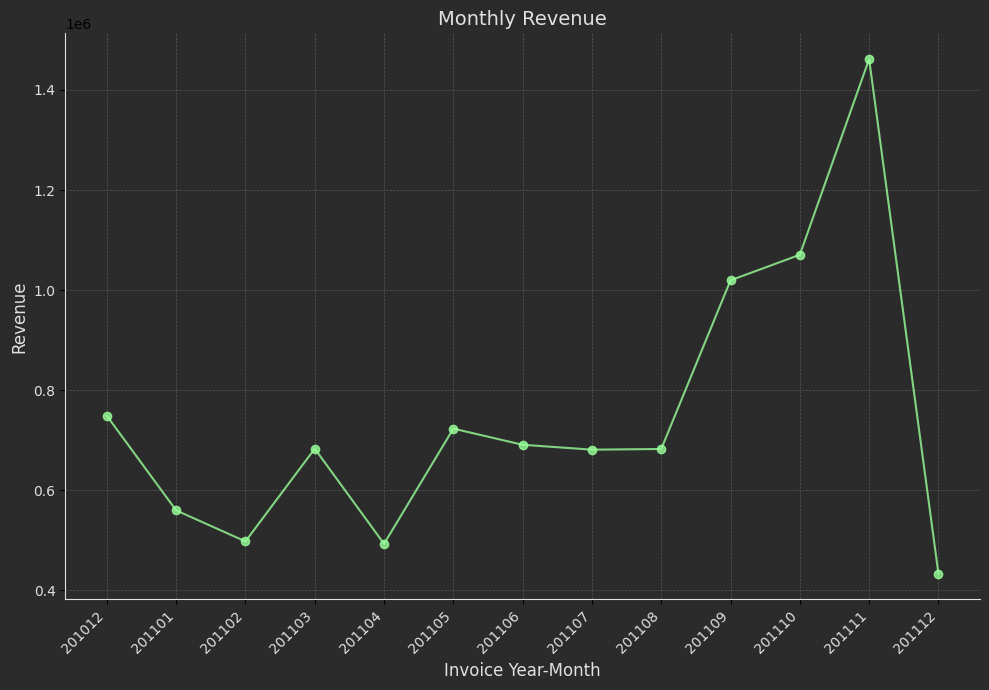

In [ ]:
fig = plt.figure(figsize=(10, 7))
fig.patch.set_facecolor('#2b2b2b')  
ax = plt.gca()
ax.set_facecolor('#2b2b2b') 


plt.plot(tx_revenue['InvoiceYearMonth'].to_numpy(dtype=str), 
         tx_revenue['Revenue'].to_numpy(), 
         marker='o', color='#99ff99', alpha=0.8)


plt.title('Monthly Revenue', fontsize=14, color='#e0e0e0')
plt.xticks(rotation=45, ha='right', fontsize=10, color='#e0e0e0')
plt.yticks(fontsize=10, color='#e0e0e0')
plt.xlabel('Invoice Year-Month', fontsize=12, color='#e0e0e0')
plt.ylabel('Revenue', fontsize=12, color='#e0e0e0')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#e0e0e0')
ax.spines['bottom'].set_color('#e0e0e0')


plt.grid(color='#555555', linestyle='--', linewidth=0.5)

plt.tight_layout()

plt.show()


In [9]:
tx_revenue['MonthlyGrowth'] = tx_revenue['Revenue'].pct_change()
tx_revenue

,InvoiceYearMonth,Revenue,MonthlyGrowth
0,201012,748957.020,NaN
1,201101,560000.260,-0.252293
2,201102,498062.650,-0.110603
3,201103,683267.080,0.371850
4,201104,493207.121,-0.278163
5,201105,723333.510,0.466592
6,201106,691123.120,-0.044530
7,201107,681300.111,-0.014213
8,201108,682680.510,0.002026
9,201109,1019687.622,0.493653


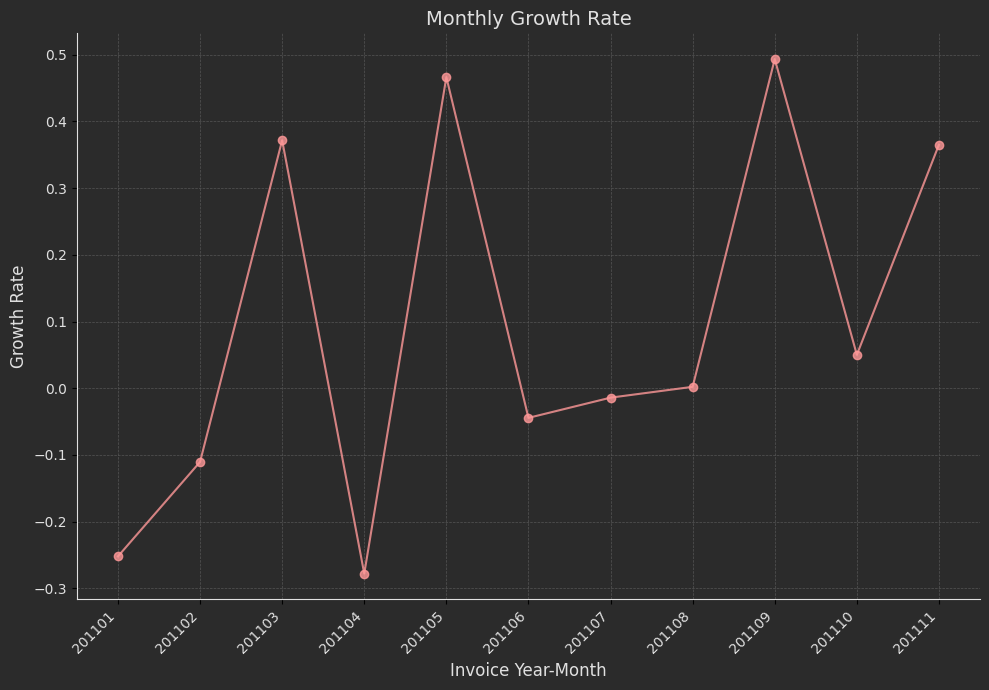

In [ ]:
fig = plt.figure(figsize=(10, 7))
fig.patch.set_facecolor('#2b2b2b')  
ax = plt.gca()
ax.set_facecolor('#2b2b2b')  


plt.plot(tx_revenue.query("InvoiceYearMonth < 201112")['InvoiceYearMonth'].to_numpy(dtype=str), 
         tx_revenue.query("InvoiceYearMonth < 201112")['MonthlyGrowth'].to_numpy(), 
         marker='o', color='#ff9999', alpha=0.8)


plt.title('Monthly Growth Rate', fontsize=14, color='#e0e0e0')
plt.xticks(rotation=45, ha='right', fontsize=10, color='#e0e0e0')
plt.yticks(fontsize=10, color='#e0e0e0')
plt.xlabel('Invoice Year-Month', fontsize=12, color='#e0e0e0')
plt.ylabel('Growth Rate', fontsize=12, color='#e0e0e0')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#e0e0e0')
ax.spines['bottom'].set_color('#e0e0e0')


plt.grid(color='#555555', linestyle='--', linewidth=0.5)

plt.tight_layout()

plt.show()


In [15]:
tx_uk = data.query("Country=='United Kingdom'").reset_index(drop=True)
tx_monthly_active = tx_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()
tx_monthly_active

,InvoiceYearMonth,CustomerID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


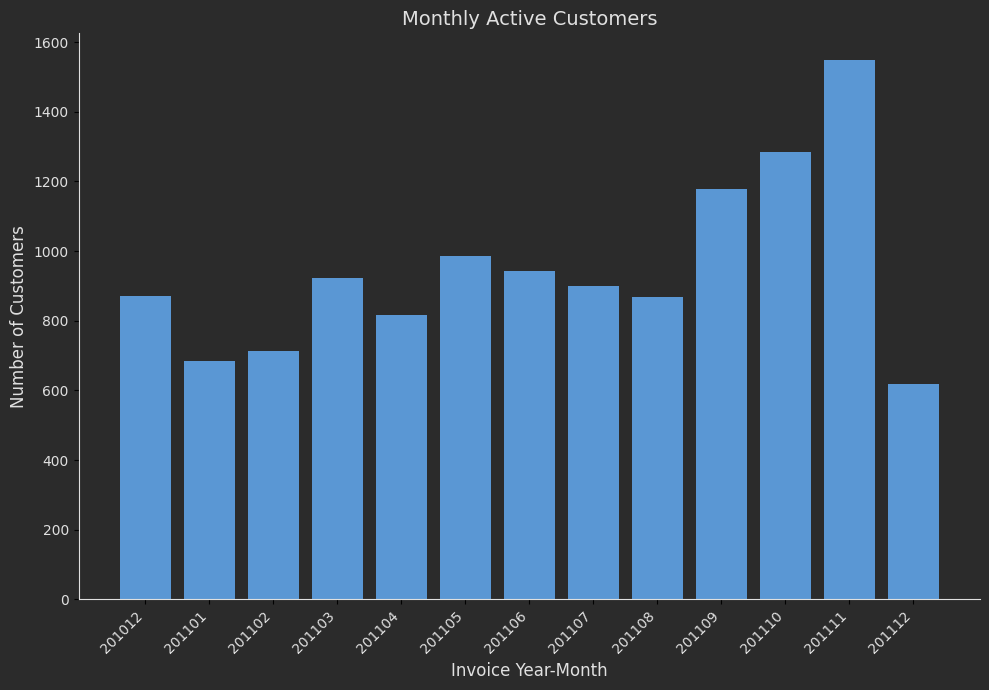

In [ ]:
fig = plt.figure(figsize=(10, 7))
fig.patch.set_facecolor('#2b2b2b') 
ax = plt.gca()
ax.set_facecolor('#2b2b2b')  


plt.bar(tx_monthly_active['InvoiceYearMonth'].to_numpy(dtype=str), 
        tx_monthly_active['CustomerID'].to_numpy(), 
        color='#66b3ff', alpha=0.8) 


plt.title('Monthly Active Customers', fontsize=14, color='#e0e0e0')
plt.xticks(rotation=45, ha='right', fontsize=10, color='#e0e0e0')
plt.yticks(fontsize=10, color='#e0e0e0')
plt.xlabel('Invoice Year-Month', fontsize=12, color='#e0e0e0')
plt.ylabel('Number of Customers', fontsize=12, color='#e0e0e0')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#e0e0e0')
ax.spines['bottom'].set_color('#e0e0e0')

plt.tight_layout()

plt.show()


In [17]:
tx_monthly_sales = tx_uk.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()
tx_monthly_sales

,InvoiceYearMonth,Quantity
0,201012,298101
1,201101,237381
2,201102,225641
3,201103,279843
4,201104,257666
5,201105,306452
6,201106,258522
7,201107,324129
8,201108,319804
9,201109,458490


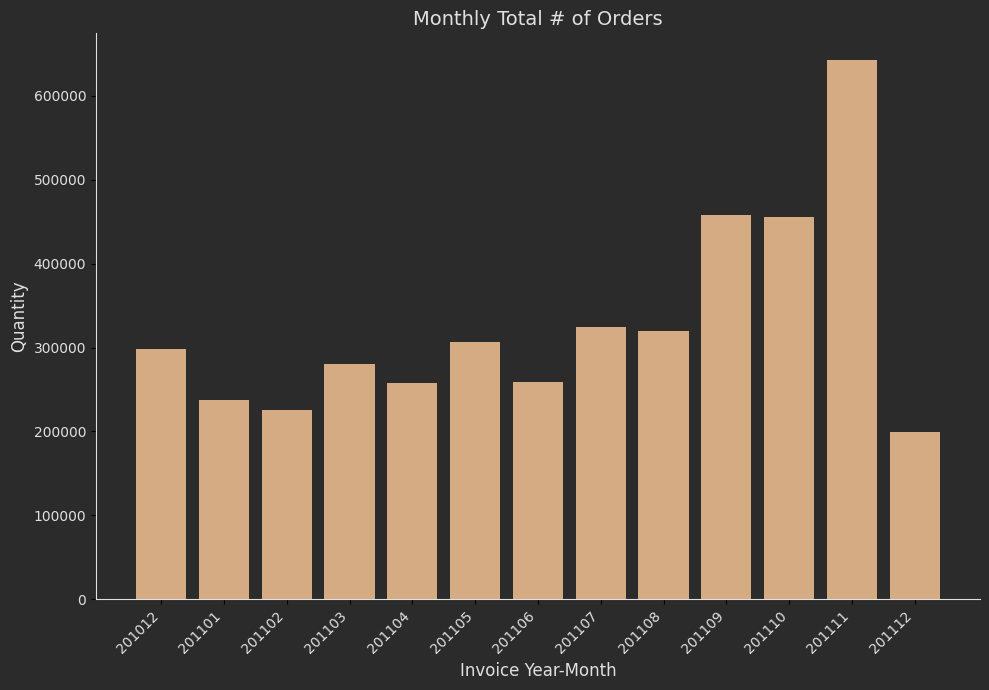

In [ ]:
fig = plt.figure(figsize=(10, 7))
fig.patch.set_facecolor('#2b2b2b') 
ax = plt.gca()
ax.set_facecolor('#2b2b2b')  


plt.bar(tx_monthly_sales['InvoiceYearMonth'].to_numpy(dtype=str), 
        tx_monthly_sales['Quantity'].to_numpy(), 
        color='#ffcc99', alpha=0.8)  


plt.title('Monthly Total # of Orders', fontsize=14, color='#e0e0e0')
plt.xticks(rotation=45, ha='right', fontsize=10, color='#e0e0e0')
plt.yticks(fontsize=10, color='#e0e0e0')
plt.xlabel('Invoice Year-Month', fontsize=12, color='#e0e0e0')
plt.ylabel('Quantity', fontsize=12, color='#e0e0e0')

 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#e0e0e0')
ax.spines['bottom'].set_color('#e0e0e0')

plt.tight_layout()

plt.show()


In [19]:
tx_monthly_order_avg = tx_uk.groupby('InvoiceYearMonth')['Revenue'].mean().reset_index()
tx_monthly_order_avg


,InvoiceYearMonth,Revenue
0,201012,16.865860
1,201101,13.614680
2,201102,16.093027
3,201103,16.716166
4,201104,15.773380
5,201105,17.713823
6,201106,16.714748
7,201107,15.723497
8,201108,17.315899
9,201109,18.931723


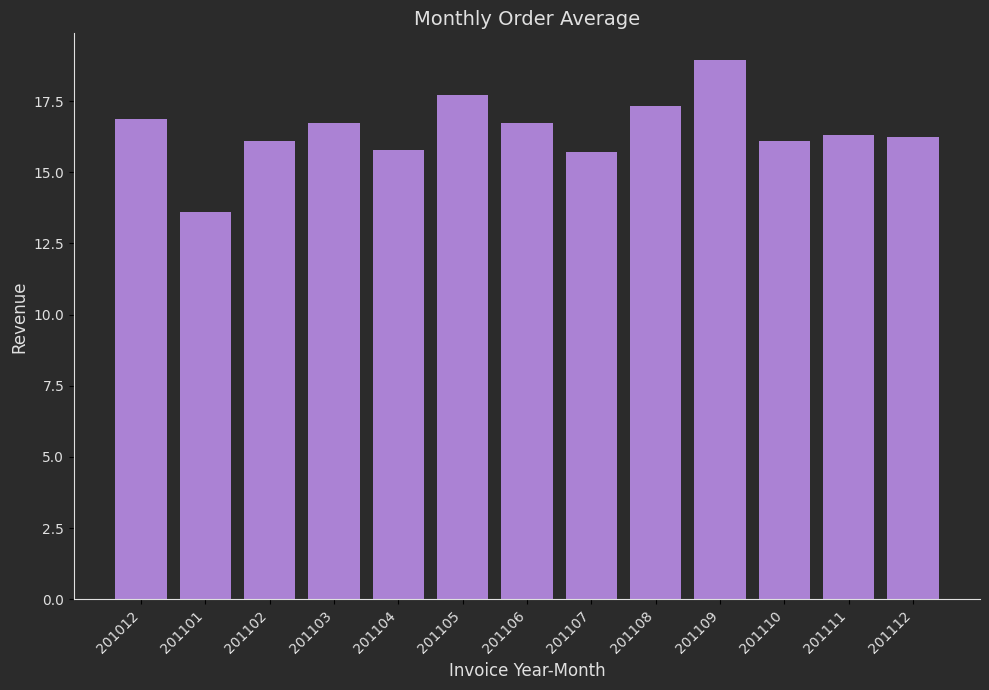

In [52]:
fig = plt.figure(figsize=(10, 7))
fig.patch.set_facecolor('#2b2b2b')  # Set the background color of the figure
ax = plt.gca()
ax.set_facecolor('#2b2b2b')  # Set the background color of the plot

# Plotting the monthly order average with customized bar color
plt.bar(tx_monthly_order_avg['InvoiceYearMonth'].to_numpy(dtype=str), 
        tx_monthly_order_avg['Revenue'].to_numpy(), 
        color='#cc99ff', alpha=0.8)  # Light purple bars with transparency

# Customizing the title and labels
plt.title('Monthly Order Average', fontsize=14, color='#e0e0e0')
plt.xticks(rotation=45, ha='right', fontsize=10, color='#e0e0e0')
plt.yticks(fontsize=10, color='#e0e0e0')
plt.xlabel('Invoice Year-Month', fontsize=12, color='#e0e0e0')
plt.ylabel('Revenue', fontsize=12, color='#e0e0e0')

# Customizing the spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#e0e0e0')
ax.spines['bottom'].set_color('#e0e0e0')

plt.tight_layout()

plt.show()


In [21]:
tx_min_purchase = tx_uk.groupby('CustomerID').InvoiceDate.min().reset_index()
tx_min_purchase.columns = ['CustomerID','MinPurchaseDate']
tx_min_purchase['MinPurchaseYearMonth'] = tx_min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)

tx_uk = pd.merge(tx_uk, tx_min_purchase, on='CustomerID')
tx_uk


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
...,...,...,...,...,...,...,...,...,...,...,...,...
361873,581416,22809,SET OF 6 T-LIGHTS SANTA,1,2011-12-08 14:58:00,2.95,14569.0,United Kingdom,201112,2.95,2011-12-08 14:58:00,201112
361874,581416,22807,SET OF 6 T-LIGHTS TOADSTOOLS,2,2011-12-08 14:58:00,1.25,14569.0,United Kingdom,201112,2.50,2011-12-08 14:58:00,201112
361875,581416,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-12-08 14:58:00,2.10,14569.0,United Kingdom,201112,2.10,2011-12-08 14:58:00,201112
361876,581416,22809,SET OF 6 T-LIGHTS SANTA,2,2011-12-08 14:58:00,2.95,14569.0,United Kingdom,201112,5.90,2011-12-08 14:58:00,201112


In [22]:
tx_uk['UserType'] = 'New'
tx_uk.loc[tx_uk['InvoiceYearMonth']>tx_uk['MinPurchaseYearMonth'],'UserType'] = 'Existing'


tx_user_type_revenue = tx_uk.groupby(['InvoiceYearMonth','UserType'])['Revenue'].sum().reset_index()


tx_user_type_revenue = tx_user_type_revenue.query("InvoiceYearMonth != 201012 and InvoiceYearMonth != 201112")
tx_user_type_revenue


,InvoiceYearMonth,UserType,Revenue
1,201101,Existing,195275.510
2,201101,New,156705.770
3,201102,Existing,220994.630
4,201102,New,127859.000
5,201103,Existing,296350.030
6,201103,New,160567.840
7,201104,Existing,268226.660
8,201104,New,108517.751
9,201105,Existing,434725.860
10,201105,New,90847.490


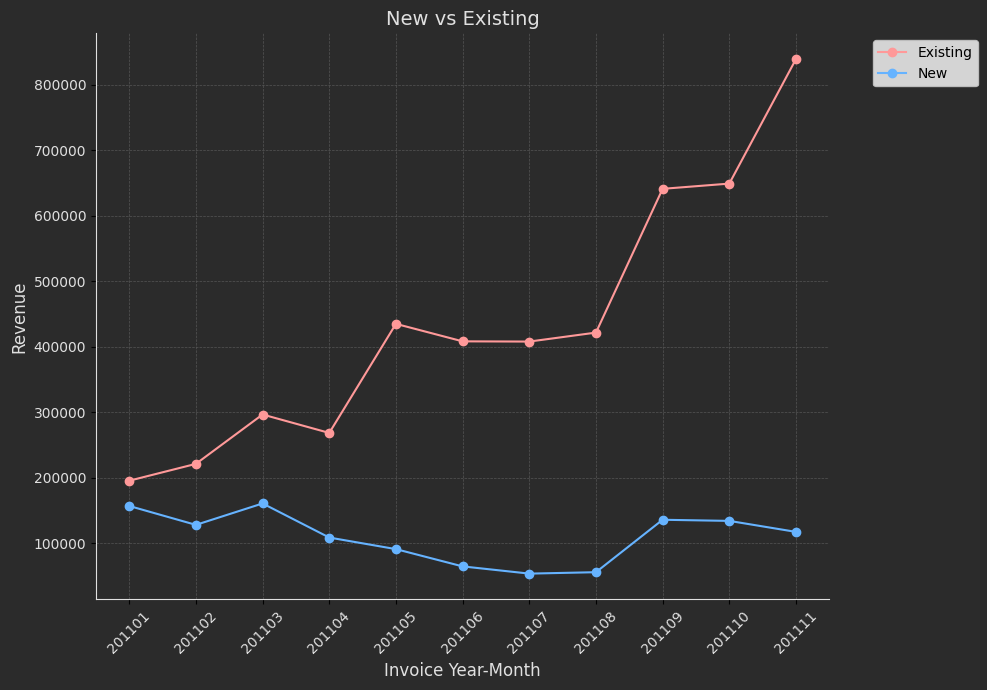

In [ ]:
plt.figure(figsize=(10,7))
fig = plt.gcf()
fig.patch.set_facecolor('#2b2b2b')  


plt.plot(tx_user_type_revenue.query("UserType == 'Existing'")['InvoiceYearMonth'].to_numpy(dtype=str), 
         tx_user_type_revenue.query("UserType == 'Existing'")['Revenue'].to_numpy(), 
         marker='o', color='#ff9999', label='Existing') 

plt.plot(tx_user_type_revenue.query("UserType == 'New'")['InvoiceYearMonth'].to_numpy(dtype=str), 
         tx_user_type_revenue.query("UserType == 'New'")['Revenue'].to_numpy(), 
         marker='o', color='#66b3ff', label='New') 


plt.grid(color='#555555', linestyle='--', linewidth=0.5)


plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)


plt.title('New vs Existing', fontsize=14, color='#e0e0e0')
plt.xlabel('Invoice Year-Month', fontsize=12, color='#e0e0e0')
plt.ylabel('Revenue', fontsize=12, color='#e0e0e0')


ax = plt.gca()
ax.set_facecolor('#2b2b2b')  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#e0e0e0')
ax.spines['bottom'].set_color('#e0e0e0')
plt.xticks(fontsize=10, color='#e0e0e0', rotation=45)
plt.yticks(fontsize=10, color='#e0e0e0')

plt.tight_layout()

plt.show()


In [26]:
tx_user_ratio = tx_uk.query("UserType == 'New'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()/tx_uk.query("UserType == 'Existing'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique() 
tx_user_ratio = tx_user_ratio.reset_index()
tx_user_ratio = tx_user_ratio.dropna()

tx_user_ratio

,InvoiceYearMonth,CustomerID
1,201101,1.124224
2,201102,0.904000
3,201103,0.792233
4,201104,0.510166
5,201105,0.343793
6,201106,0.281250
7,201107,0.236589
8,201108,0.192572
9,201109,0.304878
10,201110,0.328852


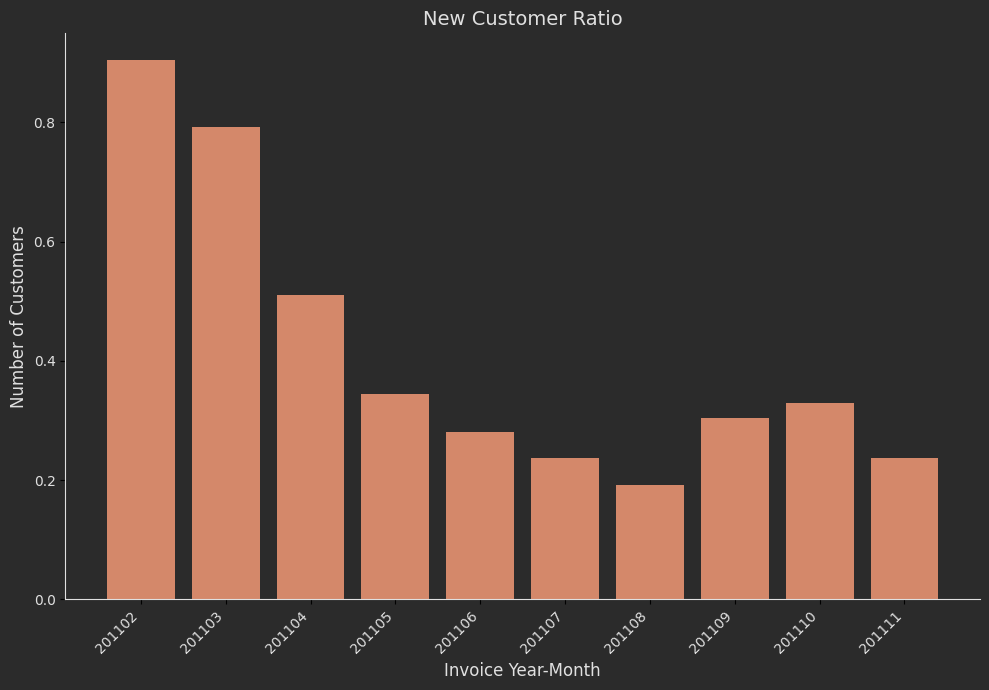

In [ ]:
fig = plt.figure(figsize=(10, 7))
fig.patch.set_facecolor('#2b2b2b')  
ax = plt.gca()
ax.set_facecolor('#2b2b2b') 


plt.bar(tx_user_ratio.query("InvoiceYearMonth>201101 and InvoiceYearMonth<201112")['InvoiceYearMonth'].to_numpy(dtype=str),
        tx_user_ratio.query("InvoiceYearMonth>201101 and InvoiceYearMonth<201112")['CustomerID'].to_numpy(),
        color='#ffa07a', alpha=0.8)  


plt.title("New Customer Ratio", fontsize=14, color='#e0e0e0')
plt.xlabel("Invoice Year-Month", fontsize=12, color='#e0e0e0')
plt.ylabel("Number of Customers", fontsize=12, color='#e0e0e0')


plt.xticks(rotation=45, ha='right', fontsize=10, color='#e0e0e0')
plt.yticks(fontsize=10, color='#e0e0e0')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#e0e0e0')
ax.spines['bottom'].set_color('#e0e0e0')

plt.tight_layout()

plt.show()


In [32]:
tx_user_purchase = tx_uk.groupby(['CustomerID','InvoiceYearMonth'])['Revenue'].sum().reset_index()
tx_retention = pd.crosstab(tx_user_purchase['CustomerID'], tx_user_purchase['InvoiceYearMonth']).reset_index()
tx_retention

InvoiceYearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945,18280.0,0,0,0,1,0,0,0,0,0,0,0,0,0
3946,18281.0,0,0,0,0,0,0,1,0,0,0,0,0,0
3947,18282.0,0,0,0,0,0,0,0,0,1,0,0,0,1
3948,18283.0,0,1,1,0,1,1,1,1,0,1,1,1,1


In [33]:
months = tx_retention.columns[2:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = tx_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = tx_retention[(tx_retention[selected_month]>0) & (tx_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)
    

tx_retention = pd.DataFrame(retention_array)
tx_retention['RetentionRate'] = tx_retention['RetainedUserCount']/tx_retention['TotalUserCount']



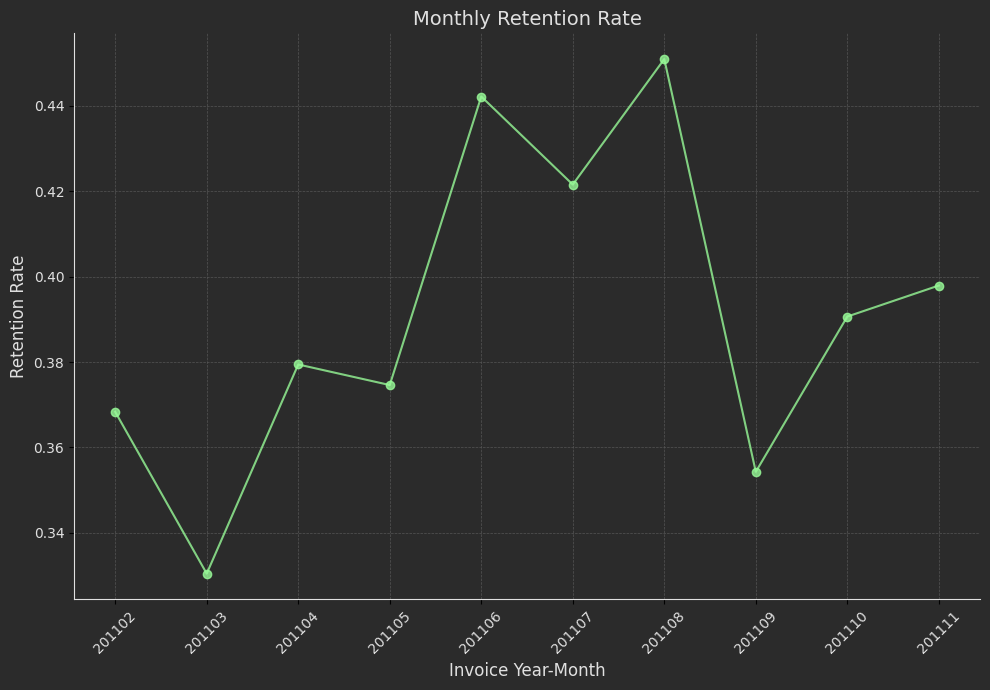

In [ ]:
fig = plt.figure(figsize=(10, 7))
fig.patch.set_facecolor('#2b2b2b') 
ax = plt.gca()
ax.set_facecolor('#2b2b2b') 


plt.plot(tx_retention.query("InvoiceYearMonth<201112")['InvoiceYearMonth'].to_numpy(dtype=str), 
         tx_retention.query("InvoiceYearMonth<201112")['RetentionRate'].to_numpy(), 
         marker='o', color='#98fb98', alpha=0.8, label='Retention Rate')  


plt.title('Monthly Retention Rate', fontsize=14, color='#e0e0e0')
plt.xlabel('Invoice Year-Month', fontsize=12, color='#e0e0e0')
plt.ylabel('Retention Rate', fontsize=12, color='#e0e0e0')


plt.grid(color='#555555', linestyle='--', linewidth=0.5)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#e0e0e0')
ax.spines['bottom'].set_color('#e0e0e0')
plt.xticks(fontsize=10, color='#e0e0e0', rotation=45)
plt.yticks(fontsize=10, color='#e0e0e0')

plt.tight_layout()

plt.show()
